# Lucid local development notebook

This notebook allows you to use your development version of the lucid codebase.
It is meant to only be used during development of lucid, not when using it.

Instead, see "usage_example.ipynb" in this folder for an example of how to use lucid in a notebook.

## Setup

### Add local package to search path

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

Now we should be able to import it directly, just like if we installed it using `pip`:

```python
import lucid
```

However, we will use `autoreload` so we can quickly iterate on local code changes:

### Enable autoreload

In [2]:
%load_ext autoreload

In [3]:
%aimport lucid
%aimport -tensorflow
%aimport -numpy

In [4]:
%aimport

Modules to reload:
lucid

Modules to skip:
numpy tensorflow


Let's check that we're actually seeing the local version, not a package installed in site-packages.
Th next cell should show the path at which you cloned the lucid repo, not a system path:

In [5]:
module_path = lucid.__path__[0]
print("Lucid was loaded from {}.".format(module_path))
assert os.path.abspath("..") in module_path
del module_path

Lucid was loaded from /Users/ludwigschubert/Code/deepviz/lucid.


## Example usage

In [6]:
from lucid.modelzoo.vision_models import InceptionV1

In [7]:
%autoreload

InceptionV1.image_value_range

(-117, 138)

In [8]:
import numpy as np

In [9]:
image = np.random.normal(loc=.5, scale=.1, size=(200,200))

INFO:root:Show is assuming rank 2 or 3 tensor to be an image.
INFO:root:Inferred canonical domain (0, 1) from (~0.08, ~0.91)
INFO:root:Stretching domain from (~0.08, ~0.91) to (0, 255).
INFO:root:Inferred image mode 'L' from rank-2 shape (200, 200)


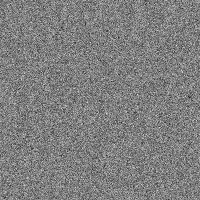

In [10]:
%autoreload

from lucid.util import *

import logging
logging.getLogger().setLevel(logging.INFO)

show(image)

In [11]:
sys.path

['',
 '/Users/ludwigschubert/homebrew/Cellar/jupyter/1.0.0_1/libexec/lib/python2.7/site-packages',
 '/Users/ludwigschubert/homebrew/Cellar/jupyter/1.0.0_1/libexec/vendor/lib/python2.7/site-packages',
 '/Users/ludwigschubert/homebrew/lib/python2.7/site-packages',
 '/Users/ludwigschubert/homebrew/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python27.zip',
 '/Users/ludwigschubert/homebrew/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7',
 '/Users/ludwigschubert/homebrew/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin',
 '/Users/ludwigschubert/homebrew/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac',
 '/Users/ludwigschubert/homebrew/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages',
 '/Users/ludwigschubert/homebrew/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk',
 '/Users/lud

In [12]:
sys.version

'2.7.14 (default, Dec 27 2017, 22:06:17) \n[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]'